In [1]:
#import warnings
import warnings
warnings.filterwarnings("ignore")

#import libraries
import pandas as pd
import numpy as np

#import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
from pydataset import data

#sklearn imports
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression

# Feature Engineering Exercises

1. Load the tips dataset.
-     a. Create a column named price_per_person. This should be the total bill divided by the party size.
-     b. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?
-     c. Use select k best to select the top 2 features for predicting tip amount. What are they?
-     d. Use recursive feature elimination to select the top 2 features for tip amount. What are they?
-    e. Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?
<br>

2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.
<br>

3. Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.
<br>

4. Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

<hr style="border:2px solid gray">

In [2]:
#first, let's load our dataset 
tips= data('tips')

In [3]:
#Now let's take a look at our dataset but using .head to get the the first 5 
#here we can see the columns that we have and what it looks like
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
#We can now see the datatypes and if there are nulls
#244 entries and 244 non-null for all columns
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [5]:
#another way to see our nulls
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
#group the columns by categorical
cat_cols = ['sex', 'smoker', 'day', 'time']

#and numerical columns
num_cols = ['total_bill', 'size']

#### #1a. Create a column named price_per_person. This should be the total bill divided by the party size.

In [7]:
#create another new column using the columns we already have
tips['price_per_person'] = tips['total_bill'] / tips['size'] 

In [8]:
#take a look
tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


In [9]:
#add new price per person column that we created to our numeric columns
num_cols.append('price_per_person')

In [10]:
#let's call numerical columns to make sure it was added
num_cols

['total_bill', 'size', 'price_per_person']

####  #1b. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

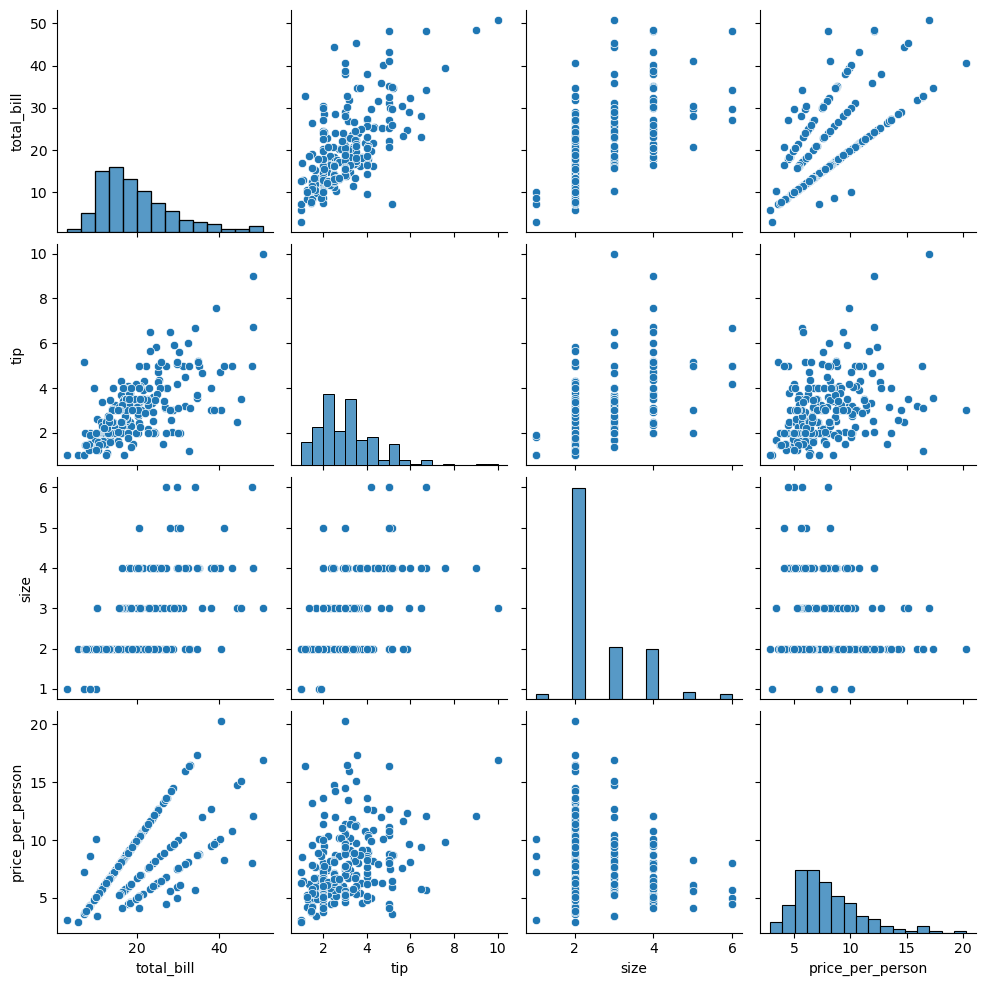

In [11]:
#using this pairplot- do we see any positive correlations?
#we can see that tip and total bills seem to have some correlation
sns.pairplot(data=tips)

In [12]:
#take another look at correlation
#I believe total_bill feature would be most important in predicting tip/tip percentage
#let's check to see if there is a correlation
#here we can see that tip column has the highest correlation with "total_bill"
tips.corr()

,total_bill,tip,size,price_per_person
total_bill,1.000000,0.675734,0.598315,0.647497
tip,0.675734,1.000000,0.489299,0.347393
size,0.598315,0.489299,1.000000,-0.175412
price_per_person,0.647497,0.347393,-0.175412,1.000000


<hr style="border:2px solid gray">

#### #1c. Use select k best to select the top 2 features for predicting tip amount. What are they?

In [13]:
#first we need to split our data
X_train = tips[num_cols]
y_train = tips.tip

#### SelectKBest

In [14]:
#create the variable using the parameters in the lesson
#parameters: f_regression stats test, give me 2 features
kbest = SelectKBest(score_func=f_regression, k=2)

In [15]:
#fit to x and y train
kbest.fit(X_train, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x173213d30>)

In [16]:
#now we are going to ask for the column names of select k best top 2 features
X_train.columns[kbest.get_support()]

Index(['total_bill', 'size'], dtype='object')

#### #1d. Use recursive feature elimination to select the top 2 features for tip amount. What are they?

#### RFE

In [17]:
#we are assigning lm variable to linear regression
lm = LinearRegression()

In [18]:
#we are assigning rfe to RFE
#parameters: linear regression (lm), give me 2 features

rfe = RFE(estimator=lm, n_features_to_select=2)

In [19]:
#now we are fitting those features to our train set
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [20]:
#create a variable that takes X_train and turns rfe features into a list
rfe_columns = X_train.columns[rfe.support_].tolist()
#call the variable
rfe_columns

['total_bill', 'price_per_person']

#### #1e. Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features your are selecting?


--- student response

<hr style="border:2px solid gray">

#### #2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.


In [21]:
#now let's put together everything we learned above and make a function to do all of those steps together
def select_kbest(X, y, k=2):
    '''
    will take in two pandas objects:
    X: a dataframe representing numerical independent features
    y: a pandas Series representing a target variable
    k: a keyword argument defaulted to 2 for the number of ideal features we elect to select
    
    return: a list of the selected features from the SelectKBest process
    '''
    kbest = SelectKBest(f_regression, k=k)
    kbest.fit(X, y)
    mask = kbest.get_support()
    return X.columns[mask]

In [22]:
#let's call our function using x and y train with the 2 top features
select_kbest(X_train, y_train, 2)

Index(['total_bill', 'size'], dtype='object')

<hr style="border:2px solid gray">


#### #3 Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.


In [23]:
#now let's put together everything we learned above and make a function to do all of those steps together
def rfe(X, y, k=2):
    '''
    will take in two pandas objects:
    X: a dataframe representing numerical independent features
    y: a pandas Series representing a target variable
    k: a keyword argument defaulted to 2 for the number of ideal features we elect to select
    
    return: a list of the selected features from the recursive feature elimination process
    '''
    rf = RFE(LinearRegression(), n_features_to_select=k)
    rf.fit(X, y)
    mask = rf.get_support()
    return X.columns[mask]

In [24]:
#let's call our function using x and y train with the 2 top features
rfe(X_train, y_train, 2)

Index(['total_bill', 'price_per_person'], dtype='object')

<hr style="border:2px solid gray">

#### #4 Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [25]:
#load swiss data
swiss= data('swiss')

In [26]:
#call the df and look at the first 5 rows to see what we're working with
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [27]:
#let's see what datatypes were working with AND if we have any nulls
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [28]:
#assign everything to X except Fertility because we are using it as our y
X= swiss.drop(columns=['Fertility'])
#assign y_train 
y = swiss['Fertility']

In [29]:
#Use the "select_Kbest" function we created to find our top 3 features
select_kbest(X, y,3)

Index(['Examination', 'Education', 'Catholic'], dtype='object')

In [30]:
#Use the "rfe" function we created to find our top 3 features
rfe(X, y, 3)

Index(['Examination', 'Education', 'Infant.Mortality'], dtype='object')

<hr style="border:2px solid gray">

#### SPLIT DATA

In [31]:
#create a function to split our data
def split_data(df):
    '''
    split our data,
    takes in a pandas dataframe
    returns: three pandas dataframes, train, test, and validate
    '''
    #create train_validate and test datasets
    train, test = train_test_split(df, train_size = 0.8, random_state = 123)
    #create train and validate datasets
    train, validate = train_test_split(train, train_size = 0.7, random_state = 123)

    # Have function print datasets shape
    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')
   
    return train, validate, test

<hr style="border:2px solid gray">

#### SCALE DATA

In [ ]:
#assign to variable #need scaler for each independent variable
#create it
scaler = MinMaxScaler()

In [ ]:
#fit it
scaler.fit(X_train)
MinMaxScaler()

In [ ]:
#use it
#make a new column within train
#use 'transform' instead of 'predict'
X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)